In [1]:
from __future__ import division
%matplotlib inline
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Parameters

In [2]:
SBJ = 'CP24'
proc_id   = 'main_ft'
an_id     = 'HGm_F_zbtS_trl2to1201_sm0_wn100_stat1'
stat_id   = 'DifOutDO_F01t06_WL005_WS005';#'DifOutDO_F02t05_WL03_WS01'
atlas_id  = 'Dx'
roi_id    = 'main3'


In [3]:
# Sets of data to run separate models
#sets = ['ROI','Time']

# Classes to Predict
y_labels = ['Dif', 'Out', 'Surp']

# Data used to predict classes
x_label = 'HFA'

# Classification Parameters
test_split = 0.1
n_boots    = 100

In [4]:
prj_dir = '/Volumes/hoycw_clust/PRJ_Error/'
results_dir = prj_dir+'results/'
fig_ftype = '.png'
data_dir = prj_dir+'data/'
sbj_dir  = data_dir+SBJ+'/'
proc_dir = sbj_dir+'04_proc/'

csv_fname = proc_dir + '_'.join([SBJ,'ROI',stat_id,an_id,atlas_id,roi_id,'full','model']) + '.csv'

## Import Data

In [5]:
data = pd.read_csv(csv_fname)

In [6]:
print data.shape
data

(86400, 20)


Dif Out Surp   hit n1_Out n1_Surp  trl_n  blk        rt    tol  \
0      Ez  Wn   Ex   hit    NaN     NaN     36    1  0.850157  0.200   
1      Ez  Wn   Ex   hit     Wn      Ex     37    1  1.110268  0.197   
2      Ez  Wn   Ex   hit     Wn      Ex     38    1  1.041104  0.194   
3      Ez  Wn   Ex   hit     Wn      Ex     39    1  0.932264  0.191   
4      Ez  Wn   Ex   hit     Wn      Ex     40    1  0.991292  0.188   
5      Ez  Wn   Ex   hit     Wn      Ex     41    1  1.062293  0.185   
6      Ez  Wn   Ex   hit     Wn      Ex     42    1  1.022996  0.182   
7      Ez  Wn   Ex   hit     Wn      Ex     43    1  0.903046  0.179   
8      Ez  Wn   Ex   hit     Wn      Ex     44    1  1.004732  0.176   
9      Ez  Wn   Ex   hit     Wn      Ex     45    1  1.057027  0.173   
10     Ez  Wn   Ex   hit     Wn      Ex     46    1  0.947953  0.170   
11     Ez  Wn   Ex   hit     Wn      Ex     47    1  1.150494  0.167   
12     Ez  Wn   Ex   hit     Wn      Ex     48    1  1.062041  0.164   
13     Ez  Wn   Ex   hit     Wn      Ex     49    1  0.915555  0.161   
14     Ez  Wn   Ex   hit     Wn      Ex     50    1  0.936789  0.158   
15     Ez  Wn   Ex   hit     Wn      Ex     51    1  0.919284  0.155   
16     Ez  Wn   Ex   hit     Wn      Ex     52    1  1.020294  0.152   
17     Ez  Wn   Ex   hit     Wn      Ex     53    1  1.004573  0.149   
18     Ez  Wn   Ex   hit     Wn      Ex     54    1  1.057741  0.146   
19     Ez  Wn   Ex   hit     Wn      Ex     55    1  0.950062  0.143   
20     Ez  Wn   Ex   hit     Wn      Ex     56    1  0.982841  0.140   
21     Ez  Wn   Ex   hit     Wn      Ex     57    1  0.875676  0.137   
22     Ez  Wn   Ex   hit     Wn      Ex     58    1  1.109408  0.134   
23     Ez  Wn   Ex   hit     Wn      Ex     59    1  1.002508  0.131   
24     Ez  Ls   Ue  miss     Wn      Ex     60    1  1.186713  0.128   
25     Ez  Wn   Ex   hit     Ls      Ue     61    1  1.010208  0.140   
26     Ez  Wn   Ex   hit     Wn      Ex     62    1  0.934341  0.137   
27     Ez  Wn   Ex   hit     Wn      Ex     63    1  0.958545  0.134   
28     Ez  Wn   Ex   hit     Wn      Ex     64    1  0.872511  0.131   
29     Ez  Wn   Ex   hit     Wn      Ex     65    1  1.027056  0.128   
...    ..  ..  ...   ...    ...     ...    ...  ...       ...    ...   
86370  Hd  Wn   Ue   hit     Ls      Ex    306    4  0.984644  0.018   
86371  Hd  Ls   Ex  miss     Wn      Ue    307    4  1.097186  0.015   
86372  Hd  Ls   Ex  miss     Ls      Ex    308    4  1.048589  0.018   
86373  Hd  Wn   Ue   hit     Ls      Ex    309    4  1.006302  0.021   
86374  Hd  Ls   Ex  miss     Wn      Ue    310    4  1.081904  0.015   
86375  Hd  Ls   Ex  miss     Ls      Ex    311    4  0.930585  0.018   
86376  Hd  Ls   Ex  miss     Ls      Ex    312    4  1.025576  0.021   
86377  Hd  Wn   Ue   hit     Ls      Ex    313    4  1.007091  0.024   
86378  Hd  Ls   Ex  miss     Wn      Ue    314    4  0.905569  0.015   
86379  Hd  Ls   Ex  miss     Ls      Ex    315    4  0.936599  0.018   
86380  Hd  Ls   Ex  miss     Ls      Ex    316    4  1.185892  0.021   
86381  Hd  Ls   Ex  miss     Ls      Ex    317    4  1.102741  0.024   
86382  Hd  Ls   Ex  miss     Ls      Ex    318    4  1.027187  0.027   
86383  Hd  Ls   Ex  miss     Ls      Ex    319    4  0.771097  0.030   
86384  Hd  Ls   Ex  miss     Ls      Ex    320    4  1.063906  0.033   
86385  Hd  Ls   Ex  miss     Ls      Ex    321    4  0.935253  0.036   
86386  Hd  Ls   Ex  miss     Ls      Ex    322    4  0.899714  0.039   
86387  Hd  Ls   Ex  miss     Ls      Ex    323    4  1.144449  0.042   
86388  Hd  Ls   Ex  miss     Ls      Ex    324    4  0.831243  0.045   
86389  Hd  Wn   Ue   hit     Ls      Ex    325    4  1.017959  0.048   
86390  Hd  Wn   Ue   hit     Wn      Ue    326    4  0.966549  0.036   
86391  Hd  Ls   Ex  miss     Wn      Ue    327    4  1.163182  0.024   
86392  Hd  Ls   Ex  miss     Ls      Ex    328    4  0.899596  0.027   
86393  Hd  Ls   Ex  miss     Ls      Ex    329

## Build model

In [7]:
channels = data['channel'].unique()
times = data['Time'].unique()
ch_data = [data[data['channel']==lab] for lab in channels]
print channels
print times

['LOF4' 'LOF5' 'LOF6' 'LOF7' 'LOF8' 'RLF6' 'RLF7' 'RLF8' 'ROF3' 'ROF4'
 'ROF5' 'ROF6' 'ROF7' 'ROF8' 'LIHA1' 'LIHA2' 'LIHA3' 'LIHA4' 'LIHP1'
 'LIHP2' 'LIHP3' 'LIHP4' 'RIHA1' 'RIHA2' 'RIHA3' 'RIHA4' 'RIHP1' 'RIHP2'
 'RIHP3' 'RIHP4']
[ 0.12  0.17  0.22  0.27  0.32  0.37  0.42  0.47  0.52  0.57]


In [77]:
acc = np.zeros([len(channels),len(times),len(y_labels),n_boots])
null_acc = np.zeros([len(channels),len(times),len(y_labels),n_boots])
for ch_ix, channel in enumerate(channels):
    time_data = [ch_data[ch_ix][ch_data[ch_ix]['Time']==time] for time in times]
    for time_ix, time in enumerate(times):
        print 'Channel: {}, Time: {}'.format(channel,time)
        # Select data
        X = time_data[time_ix]['HFA']
        y = pd.DataFrame({'Dif': np.array([0 if lab=='Ez' else 1 for lab in time_data[time_ix]['Dif'].values]),
                         'Out': np.array([0 if lab=='Ls' else 1 for lab in time_data[time_ix]['Out'].values]),
                         'Surp': np.array([0 if lab=='Ex' else 1 for lab in time_data[time_ix]['Surp'].values])})

        for factor_ix, factor in enumerate(y_labels):
            for boot_ix in range(n_boots):
                # Run classification
                X_train, X_test, y_train, y_test = train_test_split(X, y[factor], test_size = test_split)
                X_train = X_train.reshape(-1,1)
                X_test = X_test.reshape(-1,1)
                
                svm_model = SVC(kernel='linear')
                svm_model.fit(X_train.reshape(-1,1), y_train)
                acc[ch_ix,time_ix,factor_ix,boot_ix] = svm_model.score(X_test, y_test) * 100
                
                # Run null distribution
                X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=1), y[factor],\
                                                                    test_size = test_split)
                X_train = X_train.reshape(-1,1)
                X_test = X_test.reshape(-1,1)
                
                svm_model = SVC(kernel='linear')
                svm_model.fit(X_train.reshape(-1,1), y_train)
                null_acc[ch_ix,time_ix,factor_ix,boot_ix] = svm_model.score(X_test, y_test) * 100
    
#     acc_str = ['{} {:.1f}% ({:.1f}% null)'.format(factor,acc[ch_ix,factor_ix,boot_ix].mean(),\
#                                                   null_acc[ch_ix,factor_ix,boot_ix].mean()) \
#                                                for factor_ix, factor in enumerate(y_labels)]
#     print("{} Accuracy: {}".format(channel,', '.join(acc_str)))

Channel: LOF4, Time: 0.12
Channel: LOF4, Time: 0.17
Channel: LOF4, Time: 0.22
Channel: LOF4, Time: 0.27
Channel: LOF4, Time: 0.32
Channel: LOF4, Time: 0.37
Channel: LOF4, Time: 0.42
Channel: LOF4, Time: 0.47
Channel: LOF4, Time: 0.52
Channel: LOF4, Time: 0.57
Channel: LOF5, Time: 0.12
Channel: LOF5, Time: 0.17
Channel: LOF5, Time: 0.22
Channel: LOF5, Time: 0.27
Channel: LOF5, Time: 0.32
Channel: LOF5, Time: 0.37
Channel: LOF5, Time: 0.42
Channel: LOF5, Time: 0.47
Channel: LOF5, Time: 0.52
Channel: LOF5, Time: 0.57
Channel: LOF6, Time: 0.12
Channel: LOF6, Time: 0.17
Channel: LOF6, Time: 0.22
Channel: LOF6, Time: 0.27
Channel: LOF6, Time: 0.32
Channel: LOF6, Time: 0.37
Channel: LOF6, Time: 0.42
Channel: LOF6, Time: 0.47
Channel: LOF6, Time: 0.52
Channel: LOF6, Time: 0.57
Channel: LOF7, Time: 0.12
Channel: LOF7, Time: 0.17
Channel: LOF7, Time: 0.22
Channel: LOF7, Time: 0.27
Channel: LOF7, Time: 0.32
Channel: LOF7, Time: 0.37
Channel: LOF7, Time: 0.42
Channel: LOF7, Time: 0.47
Channel: LOF

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [19]:
# # Select data for each set
# for set_lab in sets:
    
# # Convert classes to integers
# x_lab_values = [data[lab].unique() for lab in x_labels]
# for col_ix, col in enumerate(x_labels):
#     for trl_ix in range(len(x)):
#     data[col] = [ix for ix, s in enumerate(x_lab_values) if ]

In [ ]:
#data['Hit'] = [1 if abs(data['RT'][ix]-prdm['target']) <= data['Tolerance'][ix] else 0 \
#               for ix in range(len(data))]


## Plot results

In [81]:
sterr = np.std(null_acc[ch_ix,:,1,:],axis=1)/np.sqrt(n_boots)
sterr.shape

(10,)

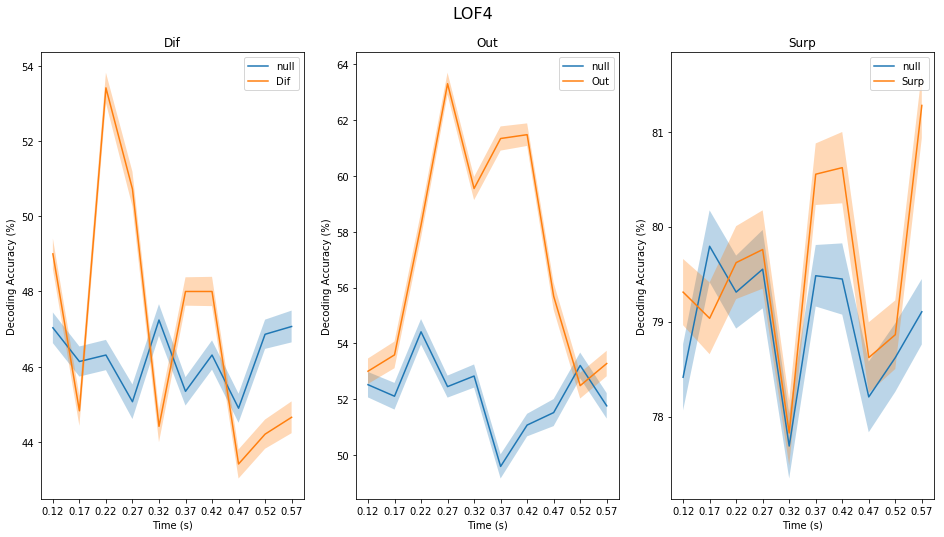

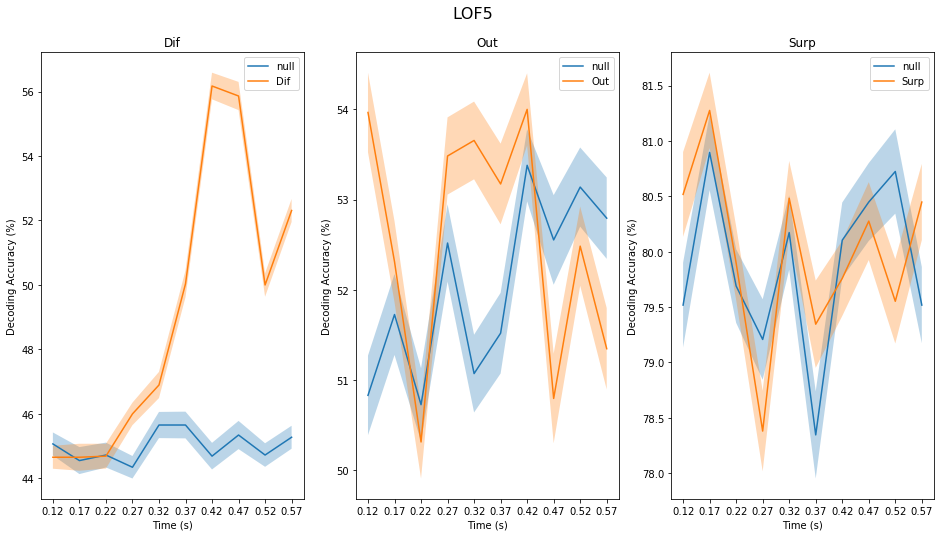

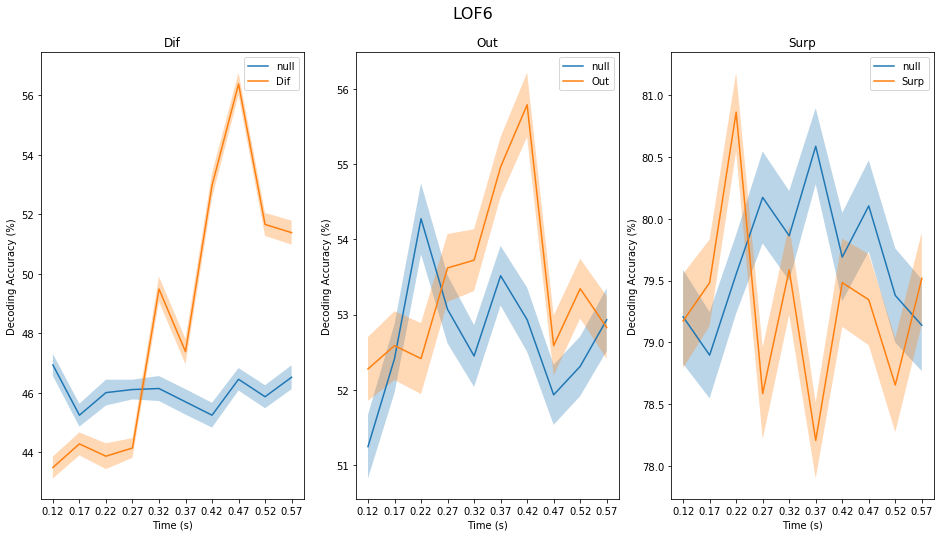

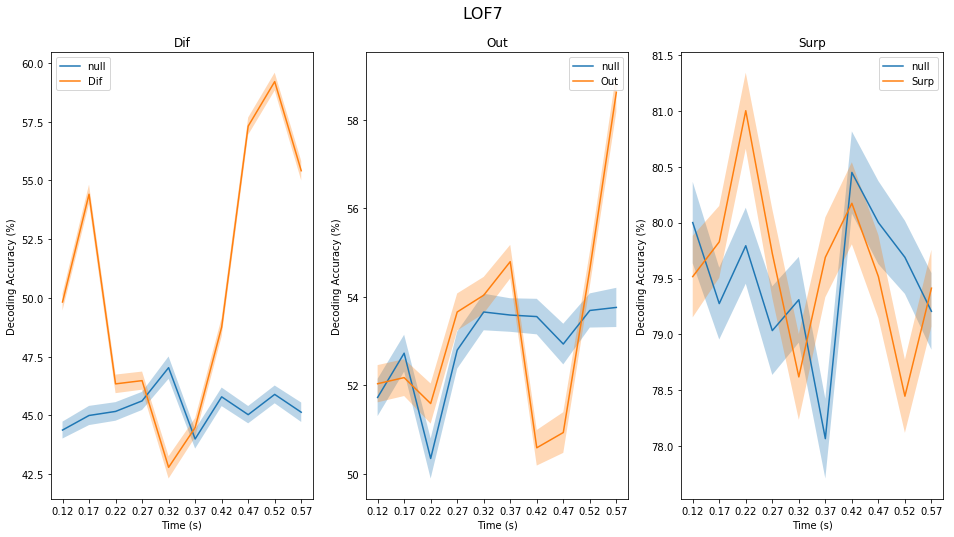

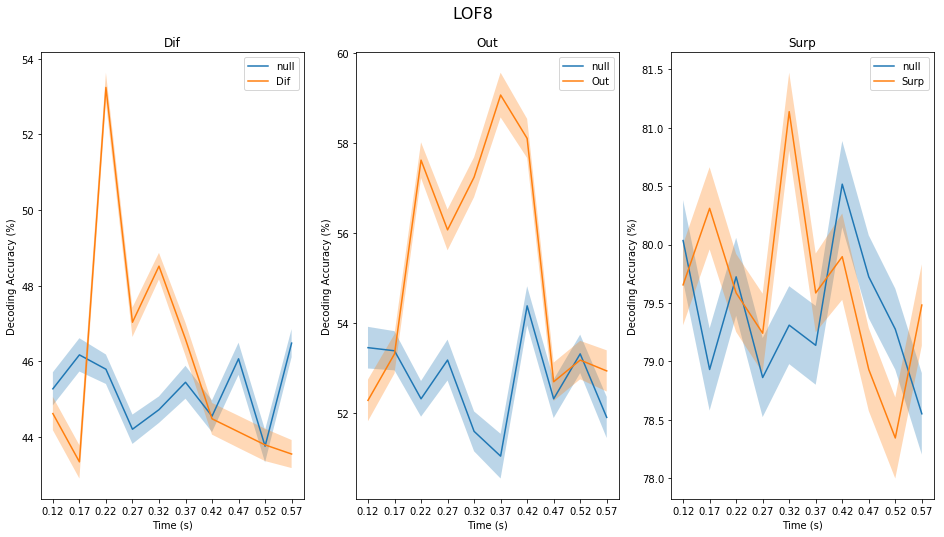

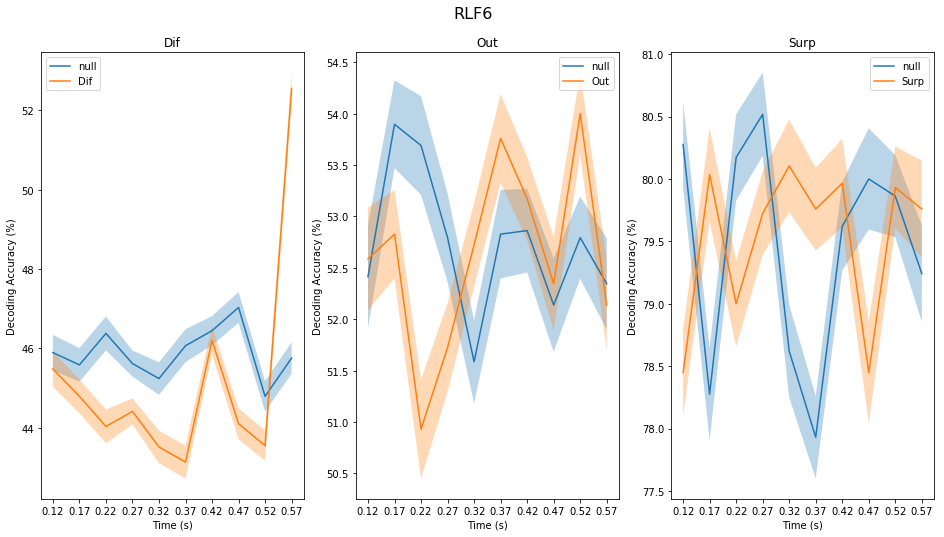

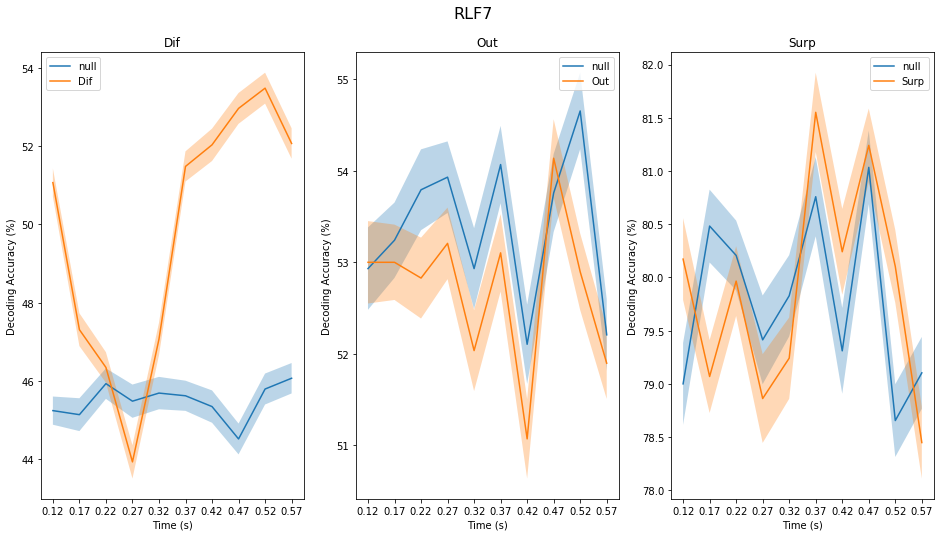

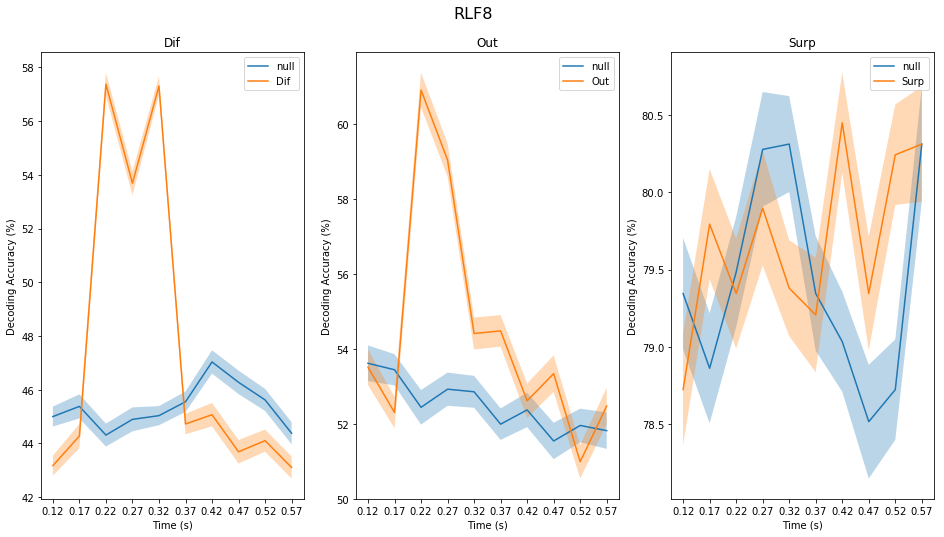

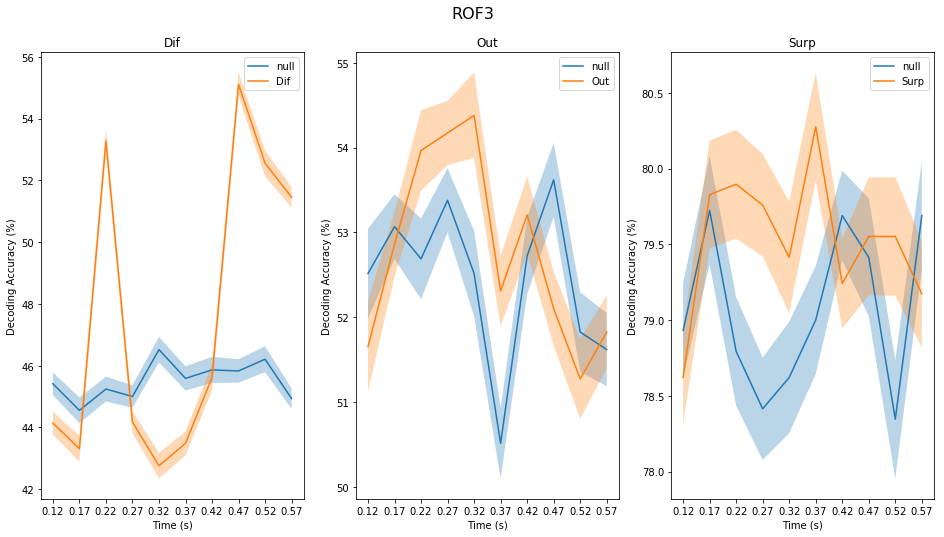

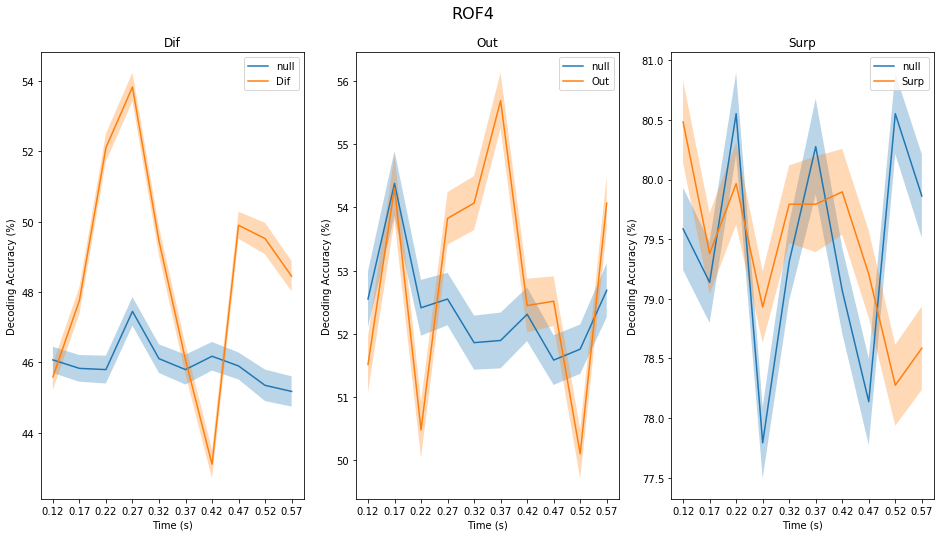

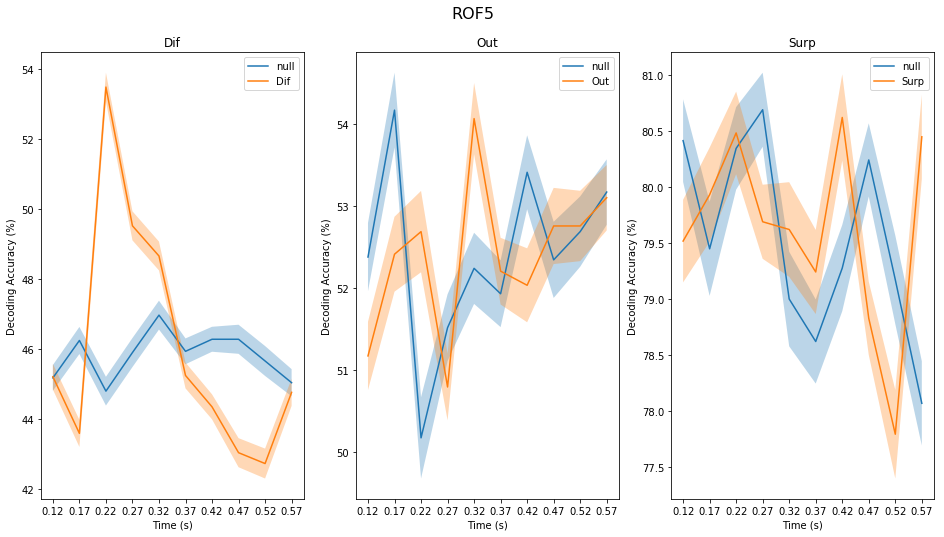

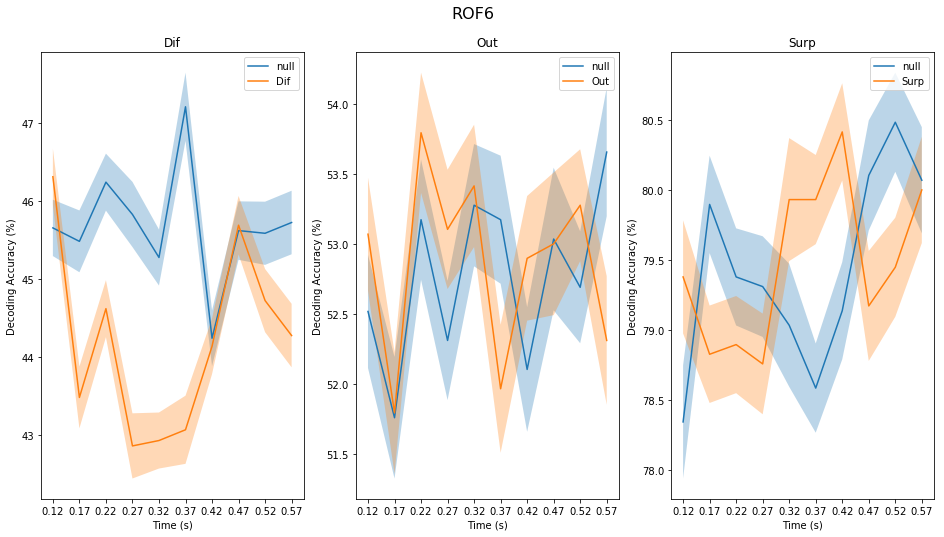

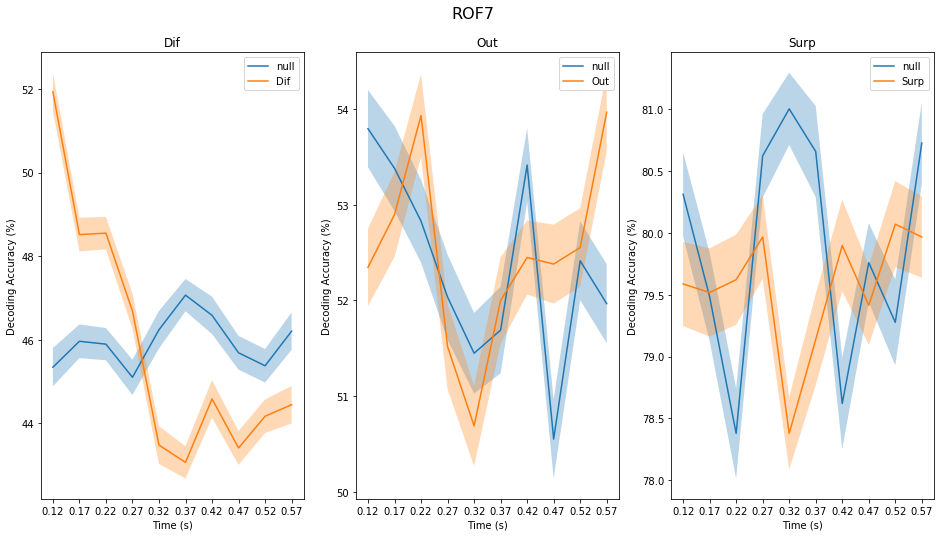

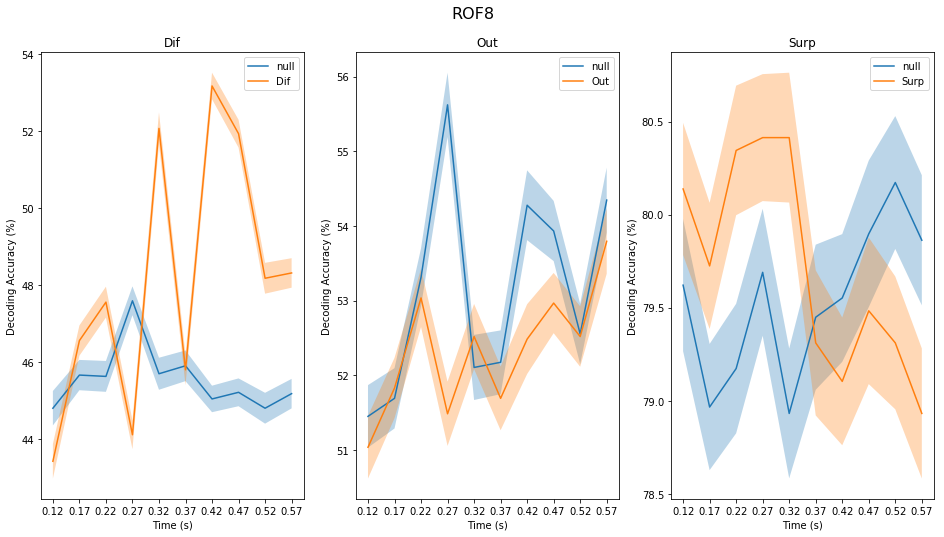

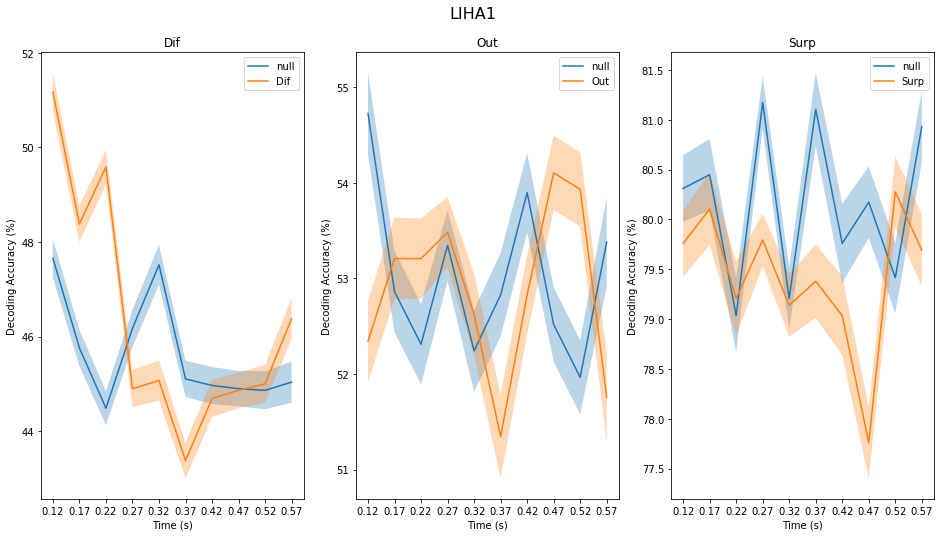

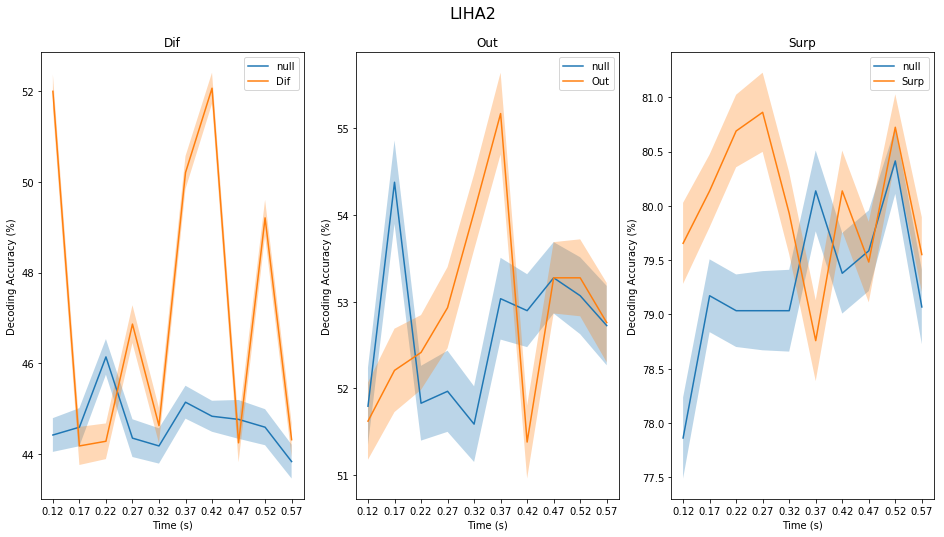

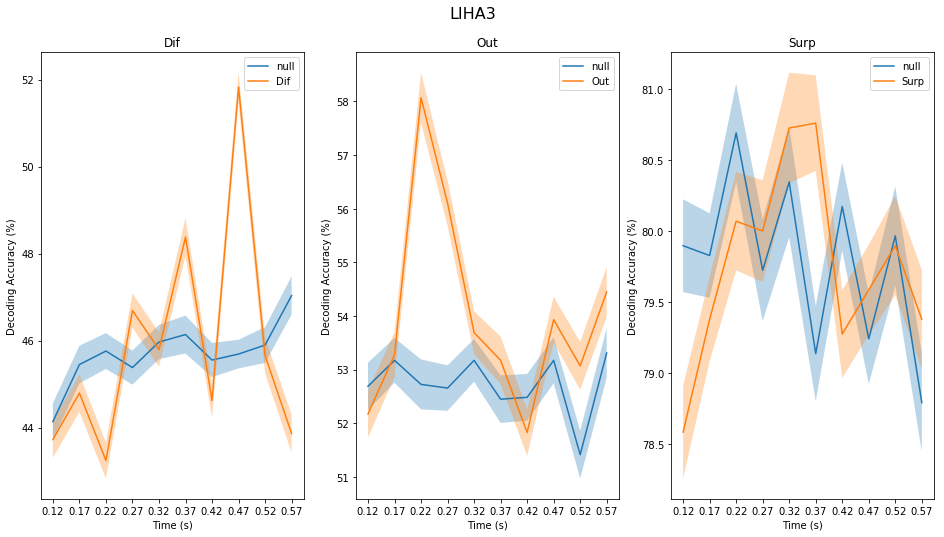

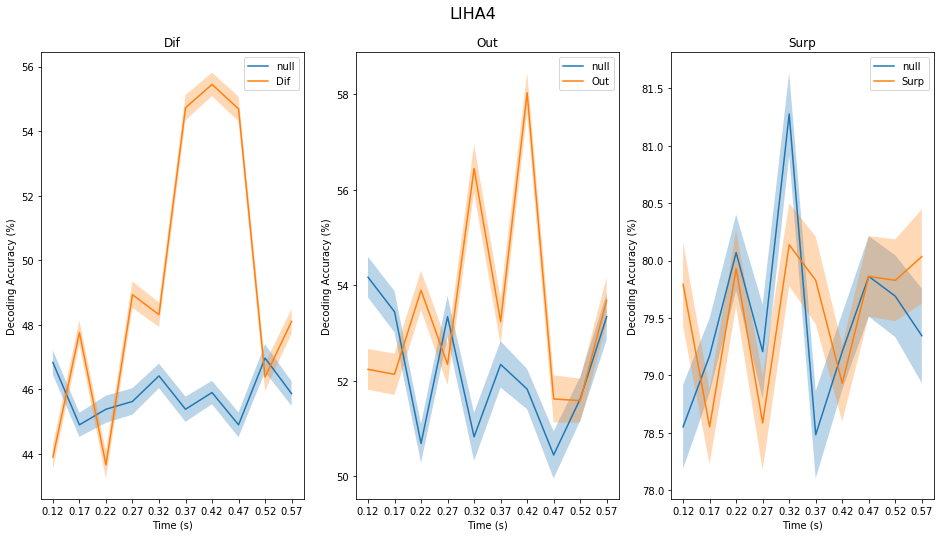

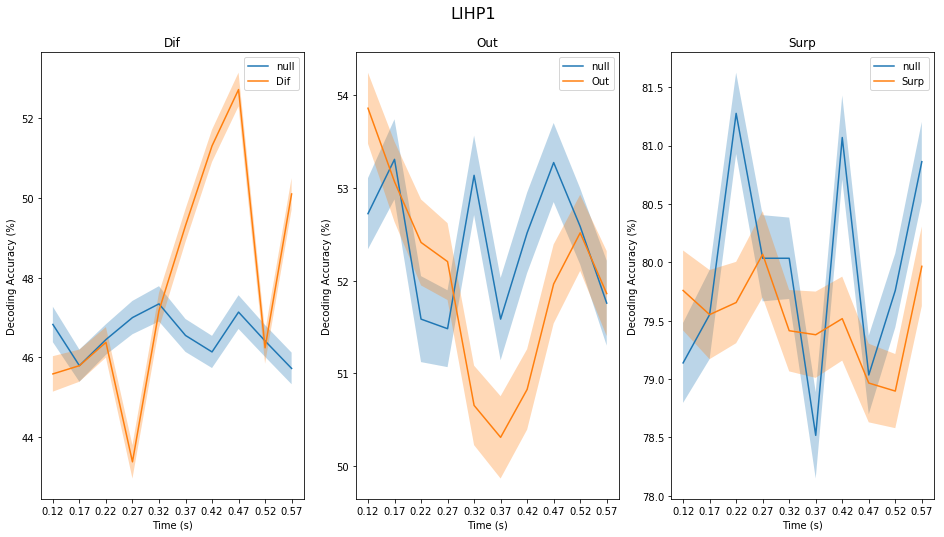

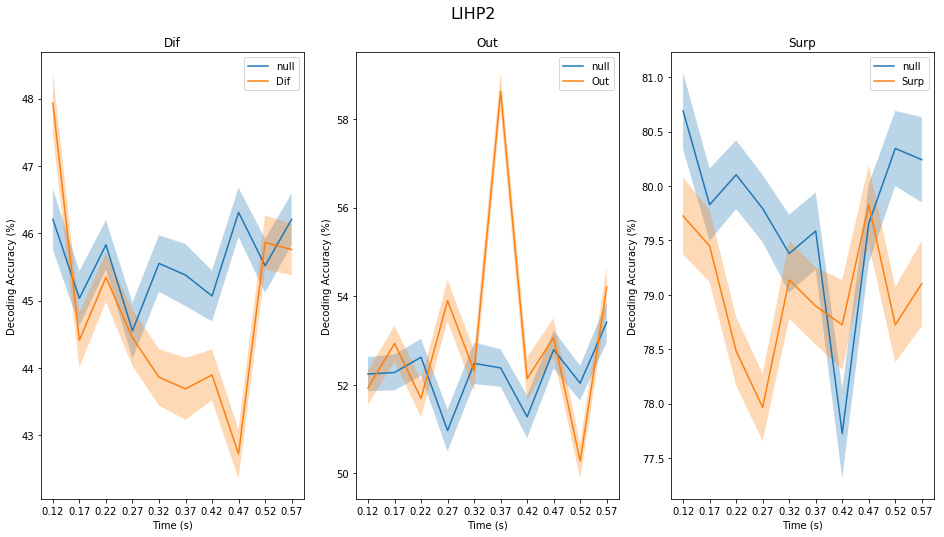

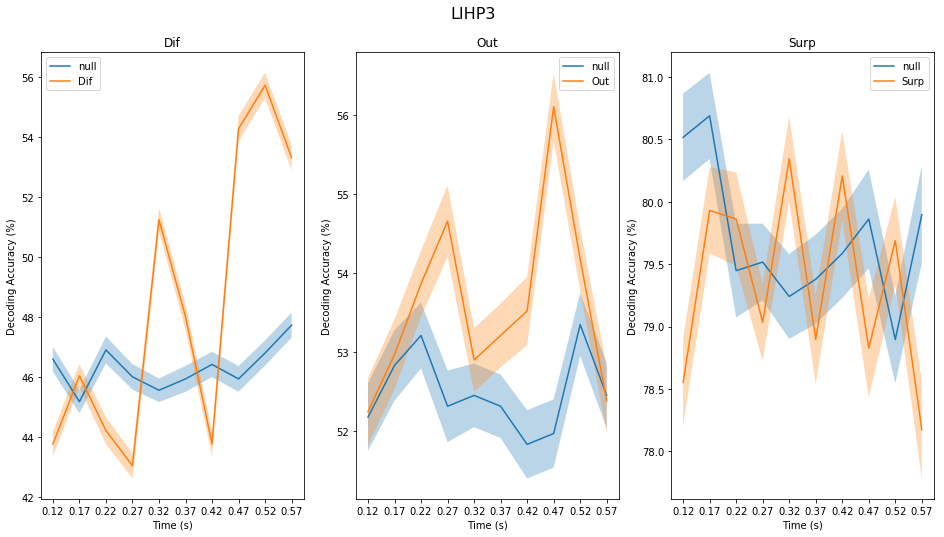

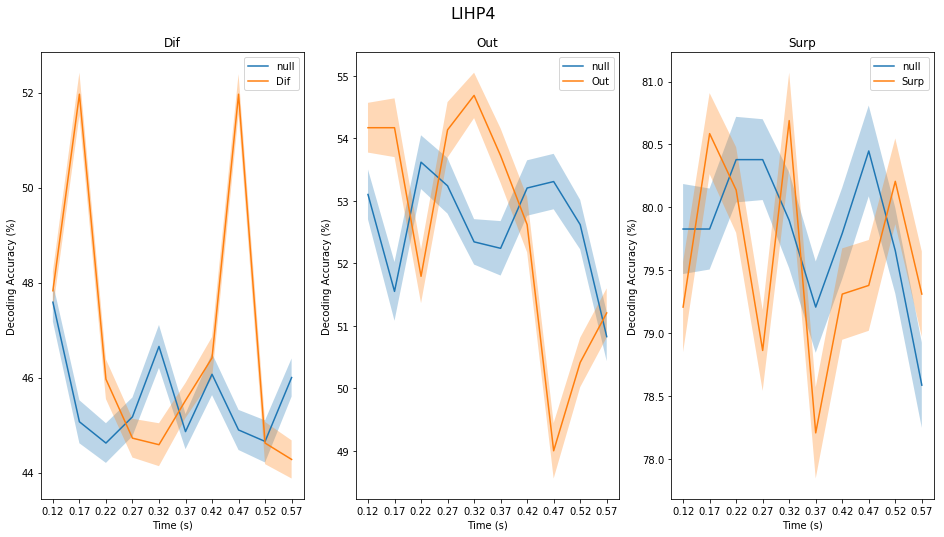

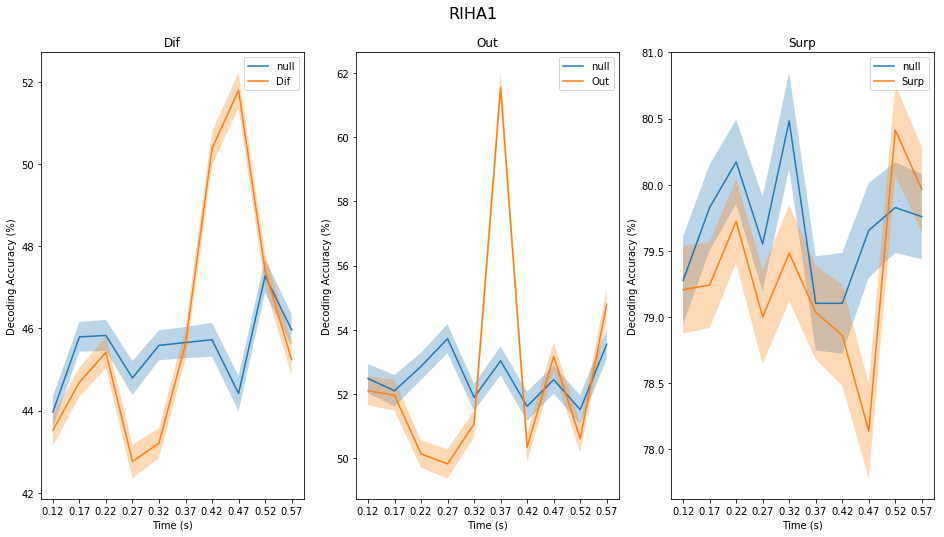

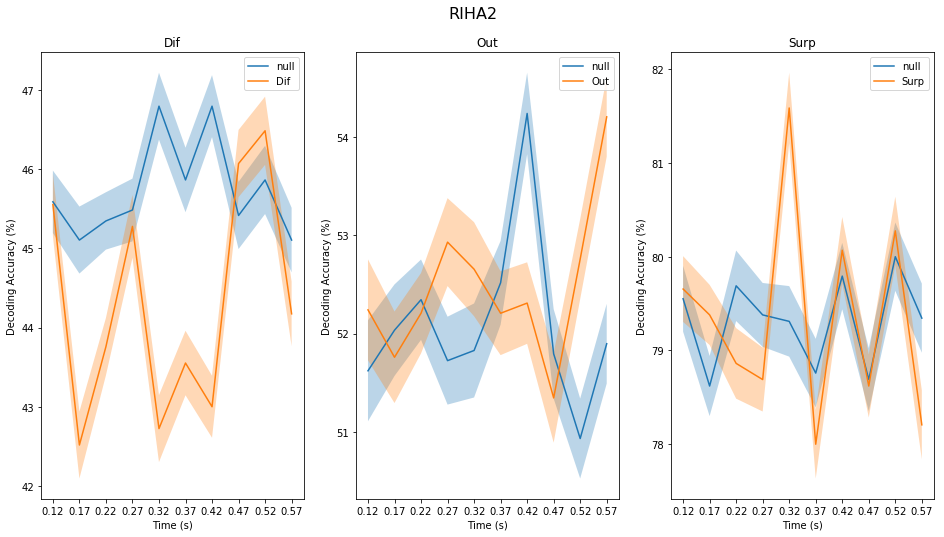

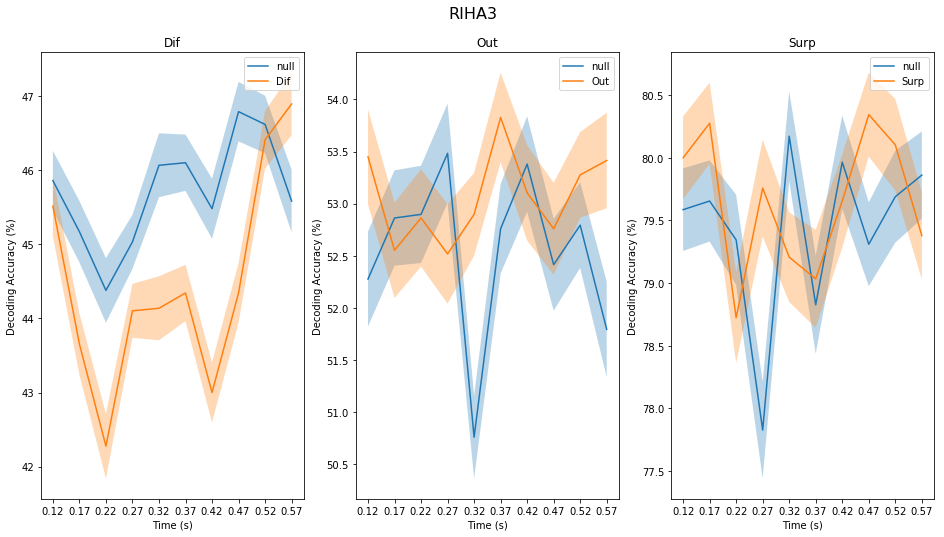

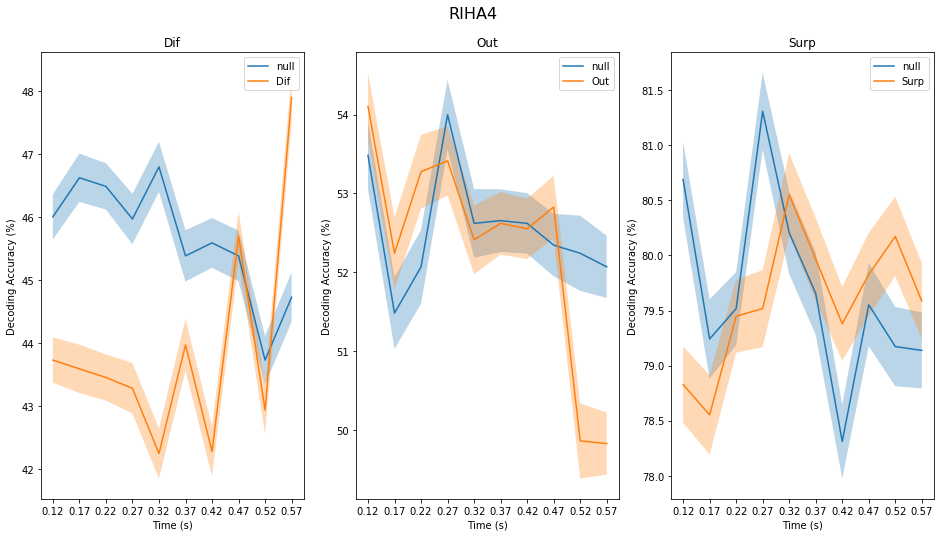

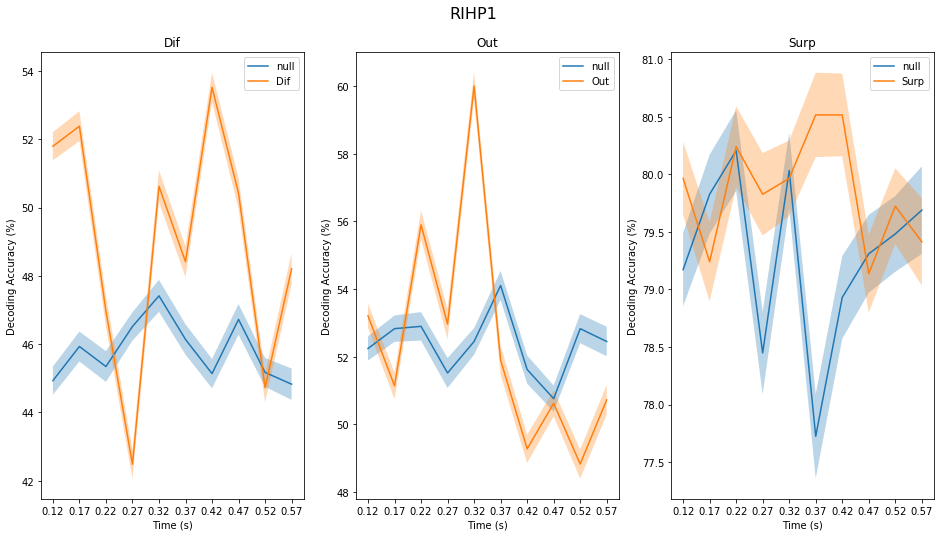

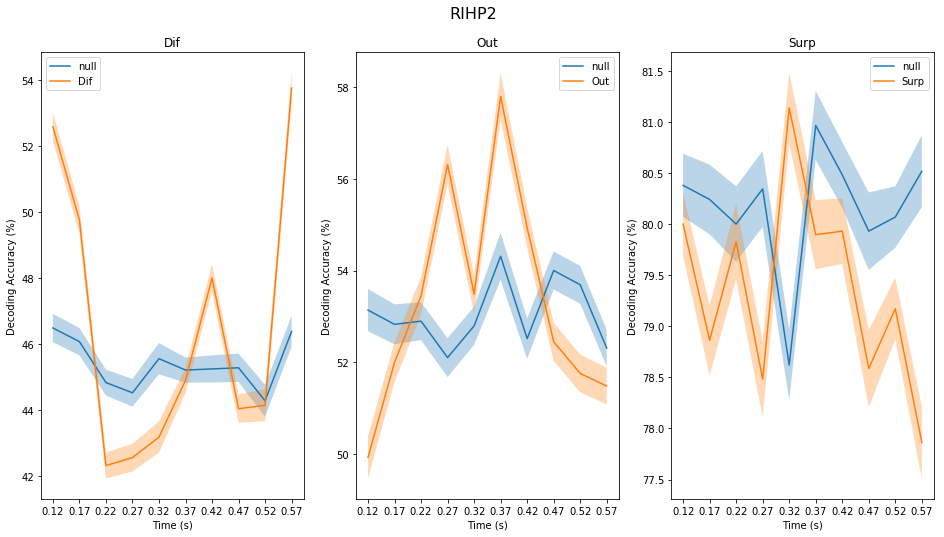

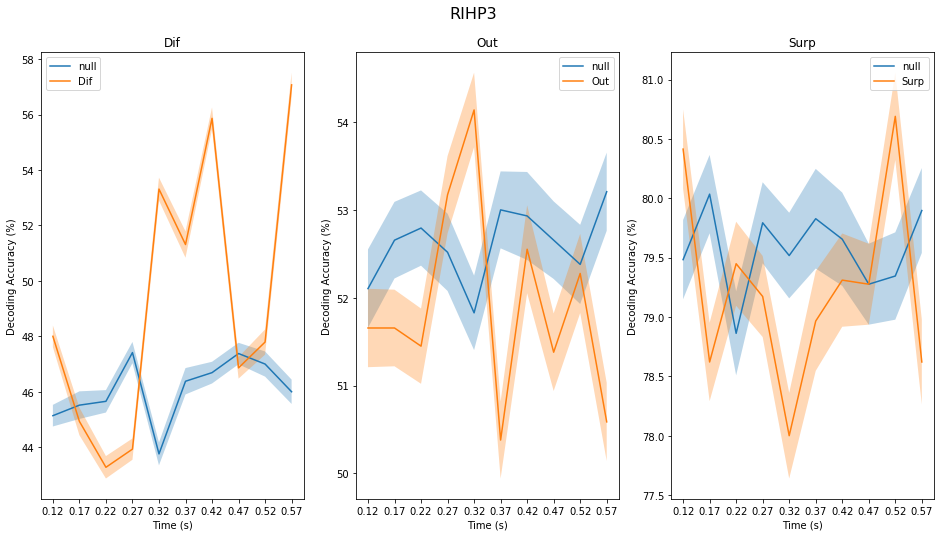

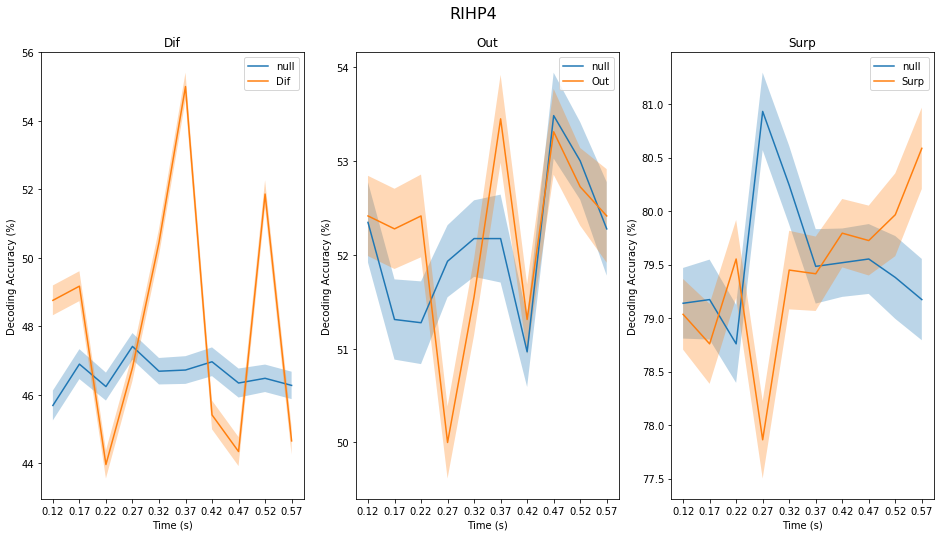

In [102]:
# Plot time series
fig_dir = results_dir+'HFA/'+SBJ+'/SVM_start/'+stat_id+'/'
for ch_ix, channel in enumerate(channels):
    f,ax = plt.subplots(1,len(y_labels))
    for grp_ix, factor in enumerate(y_labels):
        null_sterr = np.std(null_acc[ch_ix,:,grp_ix,:],axis=1)/np.sqrt(n_boots)
        # Plot Data
        ax[grp_ix].plot(times,np.mean(null_acc[ch_ix,:,grp_ix,:],axis=1),label='null')
        ax[grp_ix].fill_between(times,np.mean(null_acc[ch_ix,:,grp_ix,:],axis=1)-null_sterr/2,
                                np.mean(null_acc[ch_ix,:,grp_ix,:],axis=1)+null_sterr/2,
                               alpha=0.3)
        
        ax[grp_ix].plot(times,np.mean(acc[ch_ix,:,grp_ix,:],axis=1),label=y_labels[grp_ix])
        ax[grp_ix].fill_between(times,np.mean(acc[ch_ix,:,grp_ix,:],axis=1)-null_sterr/2,
                                np.mean(acc[ch_ix,:,grp_ix,:],axis=1)+null_sterr/2,
                               alpha=0.3)

        # Set Attributes
        ax[grp_ix].set_ylabel('Decoding Accuracy (%)')
        ax[grp_ix].set_xlabel('Time (s)')
        ax[grp_ix].set_xticks(times)
        ax[grp_ix].legend()#(loc='upper left')
        ax[grp_ix].set_title(y_labels[grp_ix])
    
    # Name and save figure
    plt.subplots_adjust(top=0.9)
    f.suptitle(channel,fontsize=16)
    f.set_figheight(8)
    f.set_figwidth(16)
    fig_name = '_'.join([SBJ,'ROI',stat_id,an_id,atlas_id,roi_id,channel])
    plt.savefig(fig_dir+fig_name+fig_ftype)

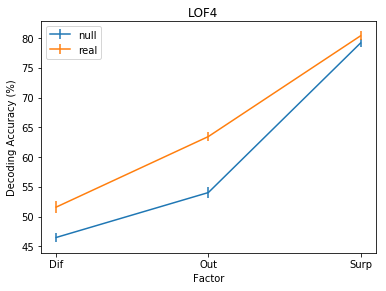

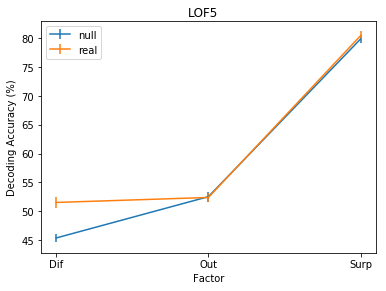

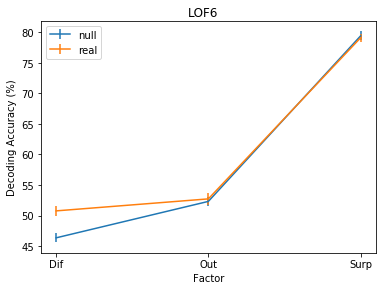

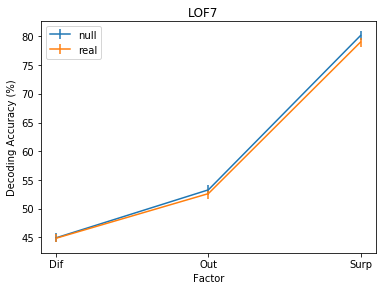

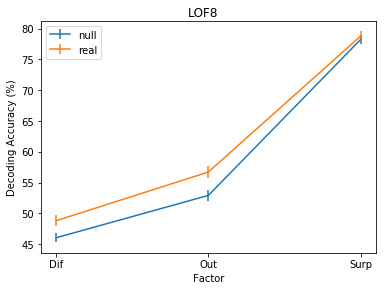

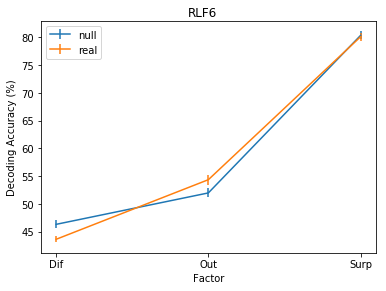

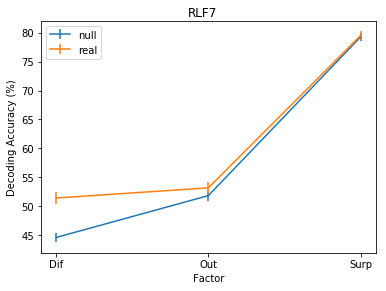

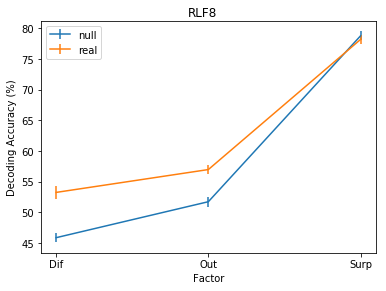

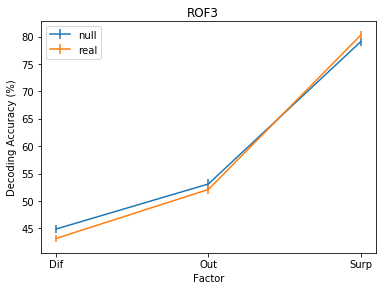

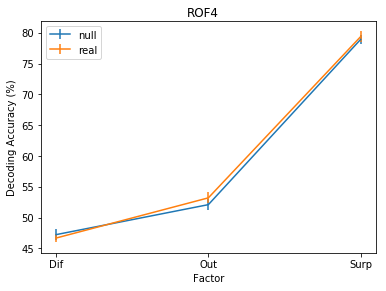

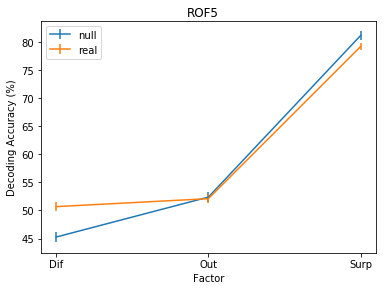

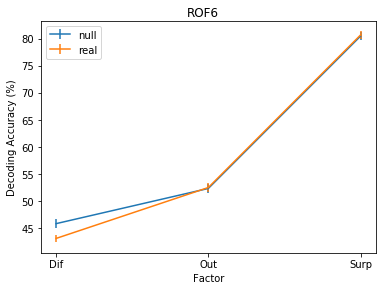

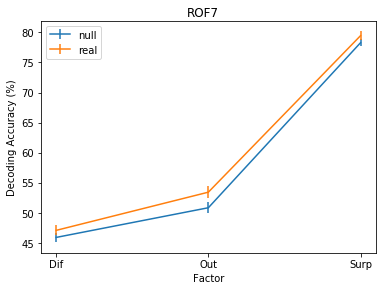

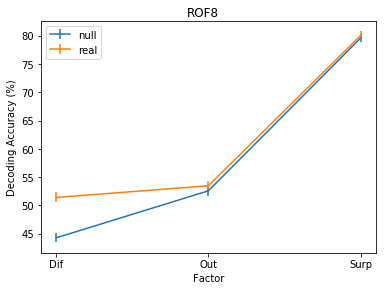

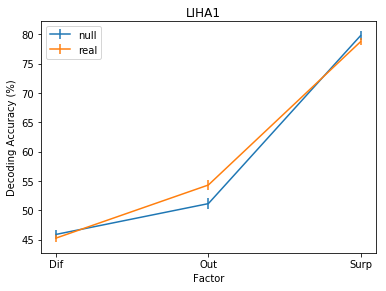

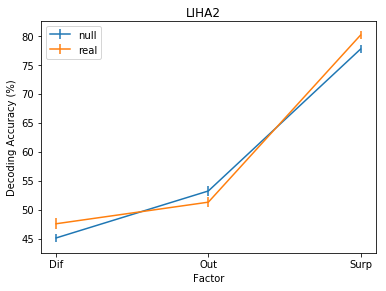

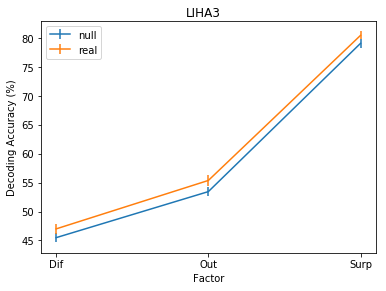

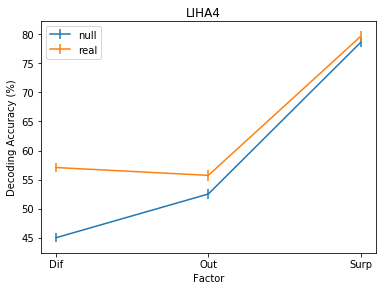

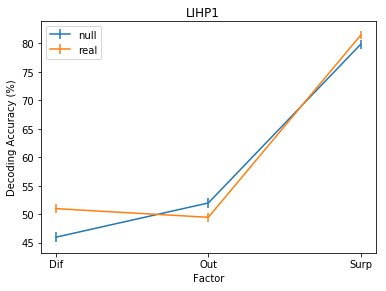

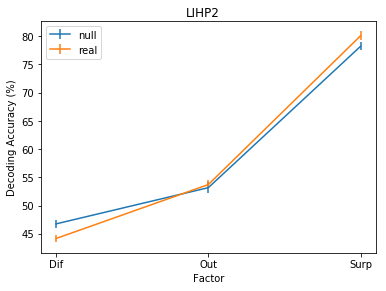

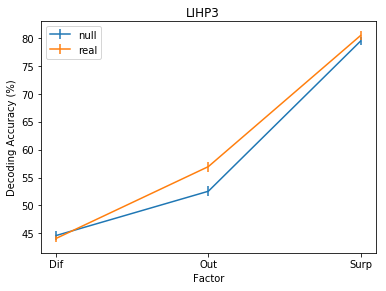

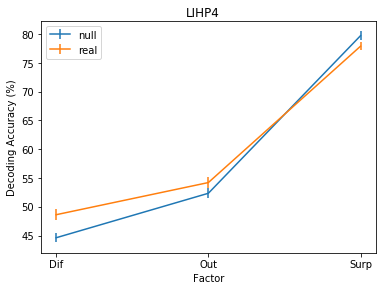

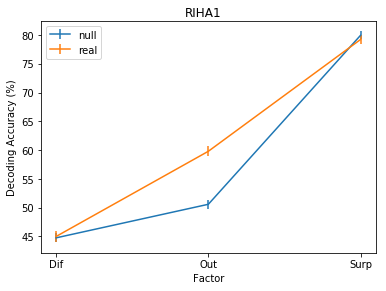

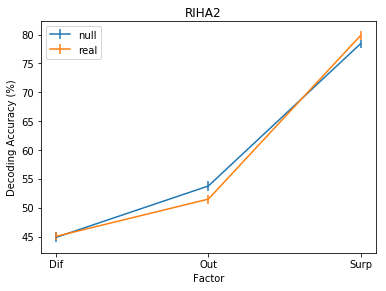

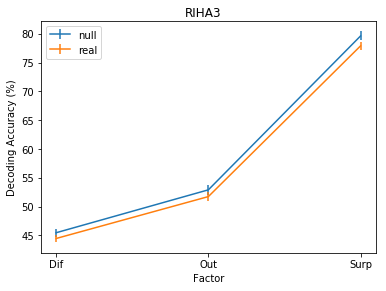

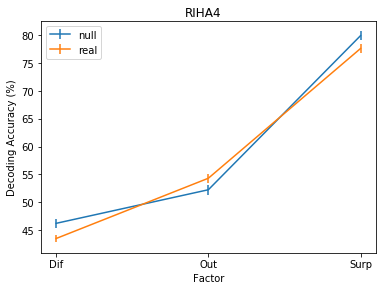

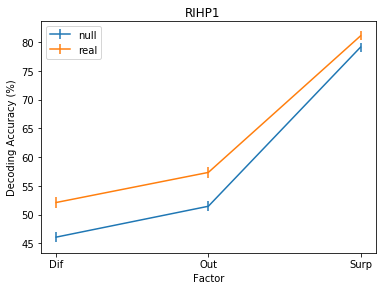

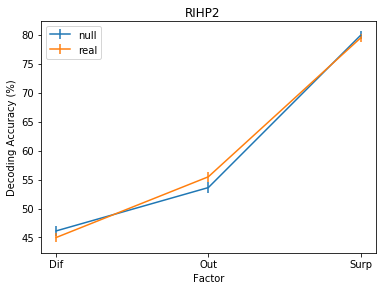

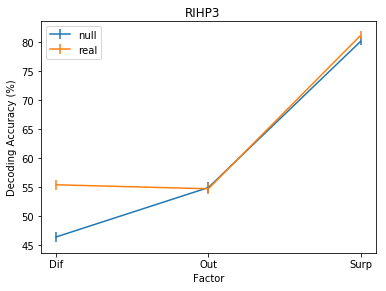

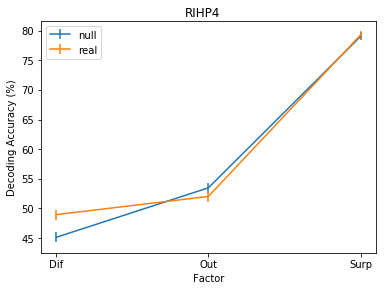

In [68]:
# Plot single time point
fig_dir = results_dir+'HFA/'+SBJ+'/SVM_start/'+stat_id+'/'
for ch_ix, channel in enumerate(channels):
    f,ax = plt.subplots(1,1)#len(y_labels))
    
    #for factor_ix, factor in enumerate(y_labels):
        # switch to plot + fill_between for time series
    # Plot Data
    ax.errorbar(range(len(y_labels)),np.mean(null_acc[ch_ix,:,:],axis=1),
                          yerr=np.std(null_acc[ch_ix,:,:],axis=1)/np.sqrt(n_boots),
               label='null')
    ax.errorbar(range(len(y_labels)),np.mean(acc[ch_ix,:,:],axis=1),
                          yerr=np.std(acc[ch_ix,:,:],axis=1)/np.sqrt(n_boots),
               label='real')
    
    # Set Attributes
    ax.set_ylabel('Decoding Accuracy (%)')
    ax.set_xlabel('Factor')
    ax.set_xticks(range(len(y_labels)))
    ax.set_xticklabels(y_labels)
    ax.legend(loc='upper left')
    
    # Name and save figure
    plt.subplots_adjust(top=0.93)
    f.suptitle(channel)
    fig_name = '_'.join([SBJ,'ROI',stat_id,an_id,atlas_id,roi_id,channel])
    plt.savefig(fig_dir+fig_name+fig_ftype)

## Run Classification

In [69]:
np.sqrt?

In [43]:
np.mean(null_acc[,axis=2).shape

(30, 3)

In [122]:
y_pred = svm_model.predict(x_test)
print("Accuracy: {}%".format(svm_model.score(x_test, y_test) * 100 ))

Accuracy: 82.7586206897%


In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1  9]
 [ 2 17]]
             precision    recall  f1-score   support

          0       0.33      0.10      0.15        10
          1       0.65      0.89      0.76        19

avg / total       0.54      0.62      0.55        29

